In [2]:
!pip install mglearn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import mglearn as mg

w[0]: 0.393906  b: -0.031804


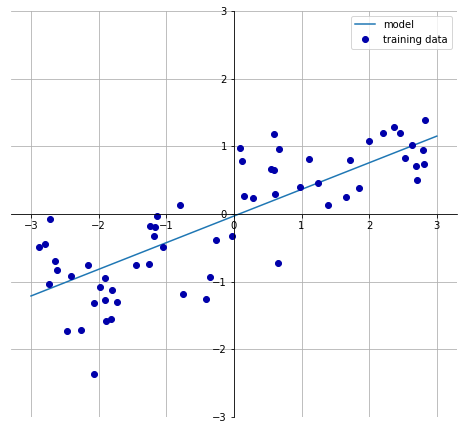

In [4]:
# wave 데이터셋을 직선으로 학습 
mg.plots.plot_linear_regression_wave()

#### 1. 선형회귀 (최소제곱법)
- 선형회귀는 예측과 훈련세트에 있는 타켓 y사이의 평균제곱 오차를 최소화하는 w와 b 를 찾는다 
- 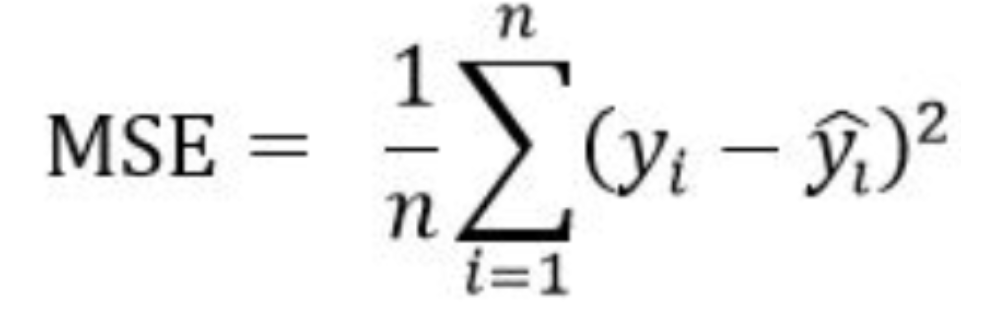

In [5]:
# 선형회귀 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [6]:
X,y= mg.datasets.make_wave(n_samples=60)
X_train,X_test, y_train,y_test=train_test_split(X,y , random_state=42)

In [7]:
lr=LinearRegression().fit(X_train, y_train)

In [12]:
# 속성값 출력 
print("가중치 :{}".format(lr.coef_))
print("절편:{}".format(lr.intercept_))

가중치 :[0.39390555]
절편:-0.031804343026759746


In [13]:
# 훈련 세트와 테스트 세트의 성능 비교 
print("훈련세트점수:{:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트점수:{:.2f}".format(lr.score(X_test,y_test)))

훈련세트점수:0.67
테스트 세트점수:0.66


In [14]:
# 훈련점수와 테스점수가 비슷하기 때문에 과소접합 상태 

In [16]:
X, y =mg.datasets.load_extended_boston()

In [17]:
X_train,X_test, y_train,y_test=train_test_split(X,y , random_state=42)

In [18]:
lr=LinearRegression().fit(X_train, y_train)

In [19]:
print("훈련세트점수:{:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트점수:{:.2f}".format(lr.score(X_test,y_test)))

훈련세트점수:0.94
테스트 세트점수:0.78


In [20]:
# 훈련데이터와 테스트데이터 사이의 성능차이는 모델이 과대 적합되었음

#### 릿지 회귀
- 가중치 절대값을 가능한 작게 만드는것, 즉 기울기를 작게 만드는것
- 이런제약을 규제라하고 과대적합이 되지않도록 모델을 강제로 제한을 함 ,L2규제를 사용
- 가중치 w를 모든 원소에 골고루 규제함으로서 0에 가깝게 만듬

In [22]:
from sklearn.linear_model import Ridge

In [23]:
ridge= Ridge().fit(X_train, y_train)

In [24]:
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트 점수:0.87
테스트 세트 점수:0.81


#### 라쏘 회귀
- L1규제를 사용하고 w를 모든 원소에 똑같은 힘으로 규제
- 특정계수는 0이되고 특성선택이 자동이 이루어짐
- 일부 계수를 0으로 만들고 모델이 이해하기 쉬어짐, 가장중요한 특성이 무엇인지 알게됨

In [25]:
from sklearn.linear_model import Lasso

In [26]:
lasso= Lasso().fit(X_train,y_train)

In [28]:
print("훈련세트 점수:{:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 수:{}".format(np.sum(lasso.coef_!=0)))

훈련세트 점수:0.27
테스트 세트 점수:0.26
사용한 특성의 수:3


In [30]:
# 특성을 3개사용해서 과소적합, 훈련 테스트 점수가 모두 낮음
# 얼마나 강하게 0으로 보낼지 조정하는 alpha매개변수를 지원
# 과소접합을 줄이기 위해 alpha값을 줄이고 max_iter(반복변수)의 기본값을 늘려줘야함 
# 두모델중 릿지회귀를 선호
# 특성이 많고 그일부분을 사용할땐 라쏘선호 
# 분석하기 쉬운모델을 원하면 라쏘선호